In [10]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from kan import *
import optuna

# 读取数据集
df = pd.read_csv('dataset_5578_normalized.csv')

# 划分训练集和测试集
train_df, test_df = train_test_split(df, test_size=0.1, random_state=2024)

train_input = torch.tensor(train_df.drop(columns=['log(kappa)', 'compound', 'aurl']).values,
                           dtype=torch.float32)
train_label = torch.tensor(train_df['log(kappa)'].values, dtype=torch.float32).unsqueeze(1)

test_input = torch.tensor(test_df.drop(columns=['log(kappa)', 'compound', 'aurl']).values,
                          dtype=torch.float32)
test_label = torch.tensor(test_df['log(kappa)'].values, dtype=torch.float32).unsqueeze(1)

dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': test_input,
    'test_label': test_label
}

def calculate_r2(model, input_data, true_labels):
    predictions = model(input_data).detach().cpu().numpy()[:, 0]
    true_values = true_labels[:, 0].cpu().numpy()
    return r2_score(true_values, predictions)

# 这里要手动输入超参数，超参数来源于模型的训练
best_model = KAN(width=[4, 4, 1], grid=3, k=2,
                 noise_scale=0, seed=0, symbolic_enabled=True)

best_model.train(dataset, opt="LBFGS", steps=15, lr=0.382248697703325, 
                 lamb_l1=3.0874938609110663, img_folder='img', save_fig=False)

train_r2 = calculate_r2(best_model, dataset['train_input'], dataset['train_label'])
test_r2 = calculate_r2(best_model, dataset['test_input'], dataset['test_label'])

train_predictions = best_model(dataset['train_input']).detach().cpu().numpy()
test_predictions = best_model(dataset['test_input']).detach().cpu().numpy()

train_results = pd.DataFrame({
    'compound': train_df['compound'],
    'True_Values': dataset['train_label'][:, 0].numpy(),
    'Predicted_Values': train_predictions[:, 0]
})

test_results = pd.DataFrame({
    'compound': test_df['compound'],
    'True_Values': dataset['test_label'][:, 0].numpy(),
    'Predicted_Values': test_predictions[:, 0]
})

# 保存结果为CSV文件
train_results.to_csv('final_train_predictions_kappa.csv', index=False)
test_results.to_csv('final_test_predictions_kappa.csv', index=False)

# 导出训练好的模型为 .pth 文件
torch.save(best_model.state_dict(), 'best_kan_model.pth')
print("模型已保存为 best_kan_model.pth")


train loss: 1.64e-01 | test loss: 1.67e-01 | reg: 1.93e+01 :   0%|           | 0/15 [00:00<?, ?it/s]

Step   0 | train loss: 1.64e-01 | test loss: 1.67e-01 | reg: 1.93e+01


train loss: 1.20e-01 | test loss: 1.17e-01 | reg: 2.14e+01 :   7%|▏  | 1/15 [00:00<00:06,  2.20it/s]

Step   1 | train loss: 1.20e-01 | test loss: 1.17e-01 | reg: 2.14e+01


train loss: 1.08e-01 | test loss: 1.04e-01 | reg: 2.21e+01 :  13%|▍  | 2/15 [00:01<00:05,  2.45it/s]

Step   2 | train loss: 1.08e-01 | test loss: 1.04e-01 | reg: 2.21e+01


train loss: 1.04e-01 | test loss: 1.00e-01 | reg: 2.29e+01 :  20%|▌  | 3/15 [00:01<00:04,  2.46it/s]

Step   3 | train loss: 1.04e-01 | test loss: 1.00e-01 | reg: 2.29e+01


train loss: 9.99e-02 | test loss: 9.57e-02 | reg: 2.36e+01 :  27%|▊  | 4/15 [00:01<00:04,  2.56it/s]

Step   4 | train loss: 9.99e-02 | test loss: 9.57e-02 | reg: 2.36e+01


train loss: 9.70e-02 | test loss: 9.28e-02 | reg: 2.16e+01 :  33%|█  | 5/15 [00:02<00:03,  2.60it/s]

Step   5 | train loss: 9.70e-02 | test loss: 9.28e-02 | reg: 2.16e+01


train loss: 9.36e-02 | test loss: 8.59e-02 | reg: 2.24e+01 :  40%|█▏ | 6/15 [00:02<00:03,  2.50it/s]

Step   6 | train loss: 9.36e-02 | test loss: 8.59e-02 | reg: 2.24e+01


train loss: 9.24e-02 | test loss: 8.51e-02 | reg: 2.29e+01 :  47%|█▍ | 7/15 [00:03<00:03,  2.53it/s]

Step   7 | train loss: 9.24e-02 | test loss: 8.51e-02 | reg: 2.29e+01


train loss: 9.16e-02 | test loss: 8.37e-02 | reg: 2.33e+01 :  53%|█▌ | 8/15 [00:03<00:02,  2.51it/s]

Step   8 | train loss: 9.16e-02 | test loss: 8.37e-02 | reg: 2.33e+01


train loss: 9.11e-02 | test loss: 8.33e-02 | reg: 2.37e+01 :  60%|█▊ | 9/15 [00:03<00:02,  2.56it/s]

Step   9 | train loss: 9.11e-02 | test loss: 8.33e-02 | reg: 2.37e+01


train loss: 9.13e-02 | test loss: 8.44e-02 | reg: 2.33e+01 :  67%|█▎| 10/15 [00:04<00:01,  2.62it/s]

Step  10 | train loss: 9.13e-02 | test loss: 8.44e-02 | reg: 2.33e+01


train loss: 9.09e-02 | test loss: 8.41e-02 | reg: 2.34e+01 :  73%|█▍| 11/15 [00:04<00:01,  2.53it/s]

Step  11 | train loss: 9.09e-02 | test loss: 8.41e-02 | reg: 2.34e+01


train loss: 9.05e-02 | test loss: 8.38e-02 | reg: 2.32e+01 :  80%|█▌| 12/15 [00:05<00:01,  2.51it/s]

Step  12 | train loss: 9.05e-02 | test loss: 8.38e-02 | reg: 2.32e+01


train loss: 9.01e-02 | test loss: 8.39e-02 | reg: 2.31e+01 :  87%|█▋| 13/15 [00:05<00:00,  2.46it/s]

Step  13 | train loss: 9.01e-02 | test loss: 8.39e-02 | reg: 2.31e+01


train loss: 8.97e-02 | test loss: 8.33e-02 | reg: 2.29e+01 :  93%|█▊| 14/15 [00:06<00:00,  2.37it/s]

Step  14 | train loss: 8.97e-02 | test loss: 8.33e-02 | reg: 2.29e+01


train loss: 8.97e-02 | test loss: 8.33e-02 | reg: 2.29e+01 : 100%|██| 15/15 [00:06<00:00,  2.48it/s]

模型已保存为 best_kan_model.pth


In [2]:
test_predictions_df = pd.read_csv('final_test_predictions_kappa.csv')
test_r2_loaded = r2_score(test_predictions_df['True_Values'], test_predictions_df['Predicted_Values'])

print('Test R² :', test_r2_loaded)
best_model.auto_symbolic()

Test R² : 0.9702198873023073
fixing (0,0,0) with gaussian, r2=0.9959954023361206
fixing (0,0,1) with cosh, r2=0.9964548349380493
fixing (0,0,2) with cosh, r2=0.999961256980896
fixing (0,0,3) with sin, r2=0.9939029216766357
fixing (0,1,0) with tanh, r2=0.999945342540741
fixing (0,1,1) with exp, r2=0.999990701675415
fixing (0,1,2) with cosh, r2=0.995338499546051
fixing (0,1,3) with gaussian, r2=0.9948826432228088
fixing (0,2,0) with gaussian, r2=0.9987557530403137
fixing (0,2,1) with gaussian, r2=0.9960852265357971
fixing (0,2,2) with gaussian, r2=0.9935315847396851
fixing (0,2,3) with arctan, r2=0.99666827917099
fixing (0,3,0) with tan, r2=0.994491696357727
fixing (0,3,1) with tan, r2=0.989963173866272
fixing (0,3,2) with tan, r2=0.991818368434906
fixing (0,3,3) with x^3, r2=0.9289260506629944
fixing (1,0,0) with gaussian, r2=0.9991965889930725
fixing (1,1,0) with cosh, r2=0.9977551102638245
fixing (1,2,0) with x^3, r2=0.8747504353523254
fixing (1,3,0) with gaussian, r2=0.99951678514480

In [3]:
# formula = best_model.symbolic_formula(
#     var=[
#         'spacegroup_relax',
#         'agl_debye','agl_gruneisen',
#         'agl_heat_capacity_Cp_300K','agl_heat_capacity_Cv_300K',                                          
#         'agl_thermal_expansion_300K','agl_vibrational_entropy_300K_atom','agl_vibrational_free_energy_300K_atom',                                          
#         'agl_bulk_modulus_static_300K','agl_bulk_modulus_isothermal_300K'
#         ]
# )[0][0]
# formula

# formula = best_model.symbolic_formula(
#     var=['SG','\Theta', '\gamma', 'C_p', 'C_v', r'\alpha', 'S_v', 'F', 'K_{s}',
#              'K_{i}']
# )[0][0]
# formula

formula = best_model.symbolic_formula(
var=['d_1','d_2','d_3','d_4']
)[0]
formula

[-3.38*(-0.09*tan(2.16*d_4 + 5.42) - 0.94*cosh(1.8*d_1 - 0.67) - 0.e-2*cosh(6.6*d_2 - 1.54) + 1 + 0.42*exp(-2.27*(-d_3 - 0.04)**2))**3 + 0.33*cosh(0.34*tan(1.4*d_4 - 1.39) - 1.24*cosh(5.5*d_1 - 1.75) + 4.61 + 2.05*exp(-10.38*(0.12 - d_3)**2) - 3.15*exp(-1.56*d_2)) - 3.06 + 2.87*exp(-2.0*(0.18*tan(1.61*d_4 - 7.6) + 0.38*tanh(4.06*d_2 + 0.01) + 0.21 + exp(-5.87*(-d_3 - 0.07)**2) - 0.34*exp(-38.44*(-d_1 - 0.07)**2))**2) + 1.51*exp(-20.2*((0.4 - d_4)**3 + 0.06*sin(7.53*d_1 + 9.38) - 0.08*atan(4.59*d_3 - 1.61) + 0.41 - 0.22*exp(-38.44*(-d_2 - 0.06)**2))**2)]

In [4]:
formula = best_model.symbolic_formula(
    var=['C_v', r'\alpha', 'F', 'K_{s}']
)[0][0]
formula

-3.38*(-0.09*tan(2.16*K_{s} + 5.42) - 0.94*cosh(1.8*C_v - 0.67) - 0.e-2*cosh(6.6*\alpha - 1.54) + 1 + 0.42*exp(-2.27*(-F - 0.04)**2))**3 + 0.33*cosh(0.34*tan(1.4*K_{s} - 1.39) - 1.24*cosh(5.5*C_v - 1.75) + 4.61 + 2.05*exp(-10.38*(0.12 - F)**2) - 3.15*exp(-1.56*\alpha)) - 3.06 + 2.87*exp(-2.0*(0.18*tan(1.61*K_{s} - 7.6) + 0.38*tanh(4.06*\alpha + 0.01) + 0.21 + exp(-5.87*(-F - 0.07)**2) - 0.34*exp(-38.44*(-C_v - 0.07)**2))**2) + 1.51*exp(-20.2*((0.4 - K_{s})**3 + 0.06*sin(7.53*C_v + 9.38) - 0.08*atan(4.59*F - 1.61) + 0.41 - 0.22*exp(-38.44*(-\alpha - 0.06)**2))**2)

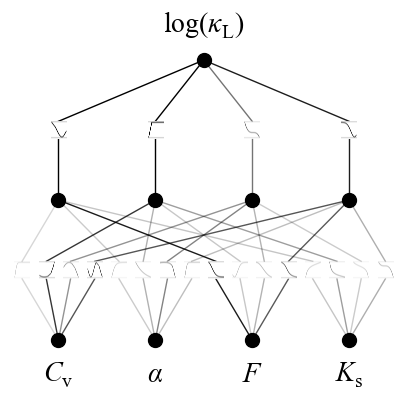

In [5]:
best_model(dataset['train_input'])
best_model.plot(
    folder='img',
    in_vars=[r'$C_{\rm v}$', r'$\alpha$', '$F$', r'$K_{\rm s}$'],
    out_vars=[r'$\log(\kappa_{\rm L})$'],beta=5
               )


In [6]:

import moviepy.video.io.ImageSequenceClip  # moviepy == 1.0.3
import os
import numpy as np

image_folder = 'img'
video_name = 'video_kappa'
fps = 4

fps = fps
files = os.listdir(image_folder)
train_index = []
for file in files:
    if file[0].isdigit() and file.endswith('.jpg'):
        train_index.append(int(file[:-4]))

train_index = np.sort(train_index)

image_files = [image_folder + '/' + str(train_index[index]) + '.jpg' for index in train_index]

clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile(video_name + '.mp4')

Moviepy - Building video video_kappa.mp4.
Moviepy - Writing video video_kappa.mp4



Moviepy - Done !
Moviepy - video ready video_kappa.mp4


In [7]:
d_1 = test_input[:, 0]
d_2 = test_input[:, 1]
d_3 = test_input[:, 2]
d_4 = test_input[:, 3]


In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

formula_out=(
-1.04 * np.sin(-5.8 * (0.25 - d_1)**2 
                + 0.41 * np.arctan(5.6 * d_3 - 1.88) 
                + 0.26 * np.arctan(6.8 * d_4 - 4.71) 
                + 8.34 
                + 1.23 * np.exp(-38.44 * (-d_2 - 0.06)**2)) 
+ 0.22 * np.sin(3.14 * np.sin(2.86 * d_1 + 9.78) 
                + 0.28 * np.sin(8.08 * d_2 - 5.62) 
                + 0.88 * np.tan(2.0 * d_4 - 0.99) 
                + 0.46 * np.abs(9.3 * d_3 - 1.18) 
                + 1.38) 
+ 1.3 * np.cosh(-0.53 * np.sin(4.23 * d_3 - 1.6) 
                + 0.44 * np.tan(2.53 * d_2 - 7.39) 
                - 0.65 * np.cosh(5.43 * d_1 - 1.74) 
                + 0.29 * np.arctan(8.45 * d_4 - 0.54) 
                + 1.4) 
- 2.77 
+ 2.63 * np.exp(-7.44 * ((0.76 - d_3)**2 
                + 0.11 * np.tan(1.46 * d_4 + 5.0) 
                + 0.3 
                - 0.22 * np.exp(-18.73 * (-d_2 - 0.13)**2) 
                - 0.12 * np.exp(-38.44 * (-d_1 - 0.07)**2))**2)
)
# Example usage with numpy arrays
test_r2_loaded = r2_score(dataset['test_label'], formula_out)

print('Test R² :', test_r2_loaded)

Test R² : 0.9638741563372917
